# Exploratory Data Analysis
- Amber Kutscher
- Data Enrichment

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
pymysql.install_as_MySQLdb()
from urllib.parse import quote_plus as urlquote

# Additional Imports
import os, json, math, time, gzip, csv
from yelpapi import YelpAPI
from tqdm.notebook import tqdm_notebook
import tmdbsimple as tmdb

In [2]:
with open (r"\Users\amber\.secret\tmdb_api.json") as f:
    login = json.load(f)

# Display the keys of the loaded dict
login.keys()

dict_keys(['API Key'])

In [3]:
tmdb.API_KEY =  login['API Key']

In [4]:
# Load the data for each year into separate dataframes
data_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz', compression='gzip')
data_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz', compression='gzip')

In [5]:
# Concantenate the data into one dataframe
combined_data = pd.concat([data_2000, data_2001], ignore_index=True)

In [6]:
# Filter out movies with valid financial information (budget or revenue > 0)
valid_financial_data = combined_data[(combined_data['budget'] > 0) | (combined_data['revenue'] > 0)]

## How many movies had valid financial information?

In [7]:
valid_financial_count = len(valid_financial_data)
print(valid_financial_count)

666


## How many movies are there in each certification category?

In [8]:
certification_counts = valid_financial_data['certification'].value_counts()
print(certification_counts)

R        228
PG-13    133
PG        35
NR        25
G         17
Name: certification, dtype: int64


## What is the average revenue per certification category?


In [9]:
average_revenue_per_certification = valid_financial_data.groupby('certification')['revenue'].mean()
print(f'The average revenue per {average_revenue_per_certification}')

The average revenue per certification
G        1.048907e+08
NR       1.415148e+07
PG       1.106791e+08
PG-13    9.797167e+07
R        3.031018e+07
Name: revenue, dtype: float64


## What is the average budget per certification category?


In [10]:
average_budget_per_certification = valid_financial_data.groupby('certification')['budget'].mean()
print(f'The average budget per {average_budget_per_certification}')

The average budget per certification
G        3.575685e+07
NR       8.113724e+06
PG       4.482849e+07
PG-13    4.332450e+07
R        1.843335e+07
Name: budget, dtype: float64


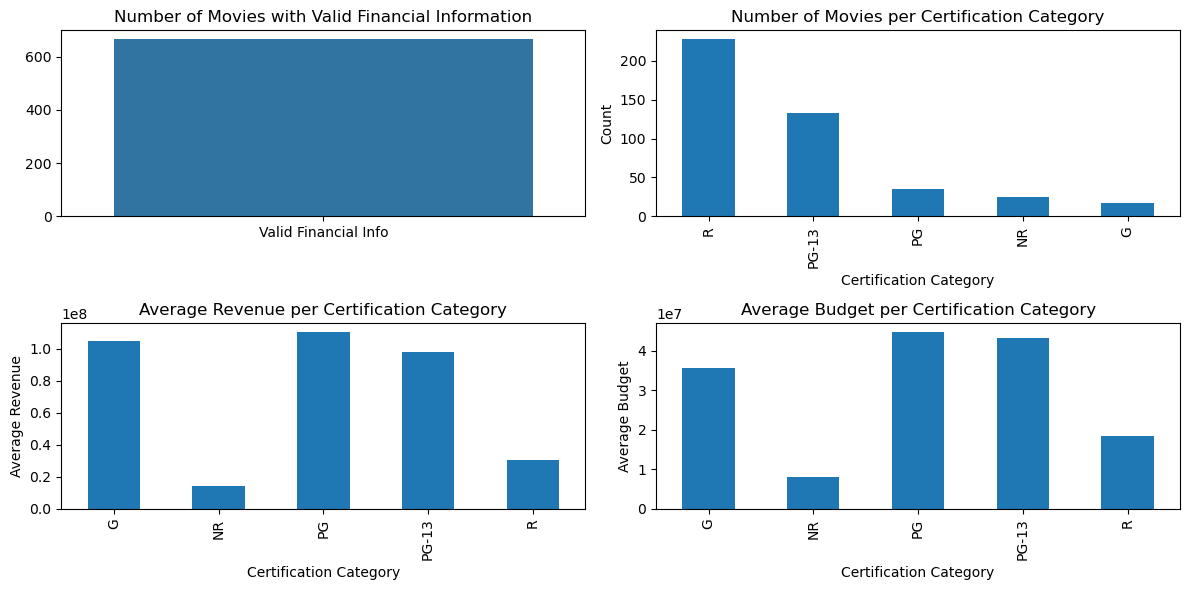

In [11]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot 1: Number of movies with valid financial information
plt.subplot(2, 2, 1)
sns.barplot(x=['Valid Financial Info'], y=[valid_financial_count])
plt.title('Number of Movies with Valid Financial Information')

# Plot 2: Number of movies per certification category
plt.subplot(2, 2, 2)
certification_counts.plot(kind='bar')
plt.title('Number of Movies per Certification Category')
plt.xlabel('Certification Category')
plt.ylabel('Count')

# Plot 3: Average revenue per certification category
plt.subplot(2, 2, 3)
average_revenue_per_certification.plot(kind='bar')
plt.title('Average Revenue per Certification Category')
plt.xlabel('Certification Category')
plt.ylabel('Average Revenue')

# Plot 4: Average budget per certification category
plt.subplot(2, 2, 4)
average_budget_per_certification.plot(kind='bar')
plt.title('Average Budget per Certification Category')
plt.xlabel('Certification Category')
plt.ylabel('Average Budget')

plt.tight_layout()
plt.show()

In [12]:
# Define the folder path where you want to save the merged .csv.gz file
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_merged_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'title-akas-us-only.csv',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

In [13]:
# Specify the file name for the merged file
merged_file_name = "final_merged_tmdb_api_data.csv.gz"

In [14]:
# Create the full file path by joining the folder path and file name
output_file_path = os.path.join(FOLDER, merged_file_name)

In [15]:
# Save the concatenated DataFrame to the specified file path
combined_data.to_csv(output_file_path, compression='gzip', index=False)

# Print a message to confirm that the file has been saved
print(f"Concatenated data saved to: {output_file_path}")

Concatenated data saved to: Data/final_merged_tmdb_api_data.csv.gz
